# Analysis of the Music Service

Within the analysis, it is planned to compare the behavior of users of the music service (Yandex Music) from Moscow and St. Petersburg.

**Research Objective** — to test three hypotheses:
1. User activity depends on the day of the week, and this is manifested differently in Moscow and St. Petersburg.
2. On Monday morning, different genres predominate in Moscow and St. Petersburg. Similarly, on Friday evening, different genres prevail depending on the city.
3. Moscow and St. Petersburg prefer different music genres. Pop music is more often listened to in Moscow, while Russian rap is more popular in St. Petersburg.

**Research Process**

User behaviour data was obtained from the file yandex_music_project.csv. The quality of the data is unknown, so preprocessing might be necessary before testing the hypotheses. Thus, the study consists of three stages:

1. Data review.
2. Data preprocessing.
3. Hypothesis testing.

## Summary of the Analysis Results

1. **The first hypothesis was fully confirmed**: the day of the week affects user activity differently in Moscow and St. Petersburg.

2. **The second hypothesis was partially confirmed**: musical preferences do not change significantly throughout the week, whether in Moscow or St. Petersburg. Small differences are noticeable only on Mondays: in Moscow users listen to the "world", while in St. Petersburg - to jazz and classical music.

3. **The third hypothesis was not confirmed**: the musical tastes of users in Moscow and St. Petersburg have more similarities than differences.

## Data Overview

Importing the necessary libraries for data analysis:

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

Reading the file `yandex_music_project.csv` with the data (the path to the data is stored in a JSON file) and saving it in the variable `df`:

In [2]:
# Reading of JSON file
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

# Reading the CSV file using the path from the JSON file
dataset_path = config['dataset_path_music']
df = pd.read_csv(dataset_path)

Displaying the first ten rows of the table:

In [3]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Displaying the general information about the table:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


The table has seven columns. The data type for all columns is object.

According to the data documentation:

- userID — user identifier;
- Track — track title;
- artist — artist name;
- genre — genre name;
- City — user's city;
- time — start time of listening;
- Day — day of the week.

The number of values in the columns differs, indicating that there are missing values in the data.

Each row in the table contains data about a listened track. Some columns describe the composition itself: title, artist, and genre. The remaining columns provide information about the user: their city and the time they listened to the music.

Preliminarily, we can assert that there is enough data to test the hypotheses. However, to proceed with the data, it is necessary to evaluate whether it is possible to address any missing values and correct the column name styles.

## Data Preprocessing

### Column Header Style

Let's rename the column headers to follow a consistent and good style by making all characters lowercase, eliminating spaces, and adding underscores between words.

In [5]:
df = df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day':'day'}) 

Displaying the column names to verify the changes:

In [6]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Missing Values

Counting how many missing values are in the table:

In [7]:
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Missing values in the "track" and "artist" columns are not critical for further data processing. However, missing values in the "genre" column may hinder comparing musical preferences between Moscow and St. Petersburg. Unfortunately, it's not possible to fill these missing values based on the available data. Therefore, we'll have to fill these gaps with explicit markers and then assess how they may impact our calculations.

In [8]:
# Filling missing values in columns from the columns_to_replace list with 'unknown' value in a loop
columns_to_replace = ['track', 'artist', 'genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')

Making sure there are no missing values left in the table.

In [9]:
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Duplicates

Counting the number of explicit duplicates in the table:

In [10]:
# Counting the explicit duplicates
df.duplicated().sum()

3826

Invoking of a specific pandas method to remove explicit duplicates:

In [11]:
# Removal of explicit duplicates
df = df.drop_duplicates() 

Checking for implicit duplicates in the 'city' and 'day' columns:

In [12]:
df['city'].unique()

array(['Saint-Petersburg', 'Moscow'], dtype=object)

In [13]:
df['day'].unique()

array(['Wednesday', 'Friday', 'Monday'], dtype=object)

There are no implicit duplicates in these columns caused by typos. Now let's eliminate implicit duplicates in the 'genre' column. For example, the same genre name may be written differently. Such errors will affect the research results.

Displaing of the list of unique genre names sorted in alphabetical order on the screen:

In [14]:
# Viewing of the unique genre names
genre_sorted = df['genre'].sort_values()
genre_sorted = genre_sorted.unique()
genre_sorted

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

The following implicit duplicates of the "hiphop" genre name were found:
* hip,
* hop,
* hip-hop.

In [15]:
# Elimination of implicit duplicates
df['genre'] = df['genre'].replace('hip', 'hiphop')
df['genre'] = df['genre'].replace('hip-hop', 'hiphop')
df['genre'] = df['genre'].replace('hop', 'hiphop')

Data preprocessing identified three issues in the data:

- violations in header style,
- missing values,
- duplicates — both explicit and implicit.
- 
The headers were corrected to facilitate working with the table, and explicit and implicit duplicates were eliminated.

Missing values were replaced with `'unknown'`.

## Hypothesis Testing

### Comparison of User Behavior in the Two Capitals

The first hypothesis suggests that users listen to music differently in Moscow and St. Petersburg. We will test this assumption using data from three days of the week: Monday, Wednesday, and Friday. To do this, we will separate users from Moscow and St. Petersburg and compare the number of tracks listened to by each group of users on Monday, Wednesday, and Friday.

First, let's calculate and visualize the total number of tracks listened to in Moscow and St. Petersburg.

In [16]:
city_track_count = df.groupby('city')['track'].count()
city_track_count

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64

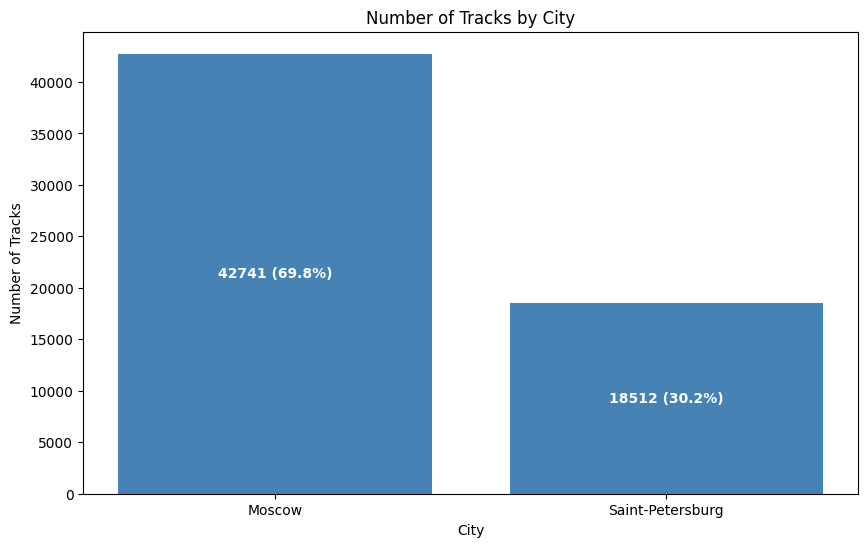

In [17]:
# Converting to lists
labels = city_track_count.index.tolist()
sizes = city_track_count.values.tolist()

# Creating a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='steelblue')

# Adding labels inside the bars
for bar, size in zip(bars, sizes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval / 2, 
             f'{yval} ({yval / sum(sizes) * 100:.1f}%)', 
             ha='center', 
             va='center', 
             color='white', 
             weight='bold')

# Adding title and axis labels
plt.title('Number of Tracks by City')
plt.xlabel('City')
plt.ylabel('Number of Tracks')

# Displaying the plot
plt.show()

In Moscow there are more listens than in St. Petersburg. This does not mean that users in Moscow listen to music more often. There are simply more users in Moscow.

Now let's group the data by day of the week and count the number of listens on Monday, Wednesday, and Friday (the data only contains information about listens on these days).

In [18]:
# Counting listens on each of the three days
day_track_count = df.groupby('day')['track'].count()
day_track_count

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64

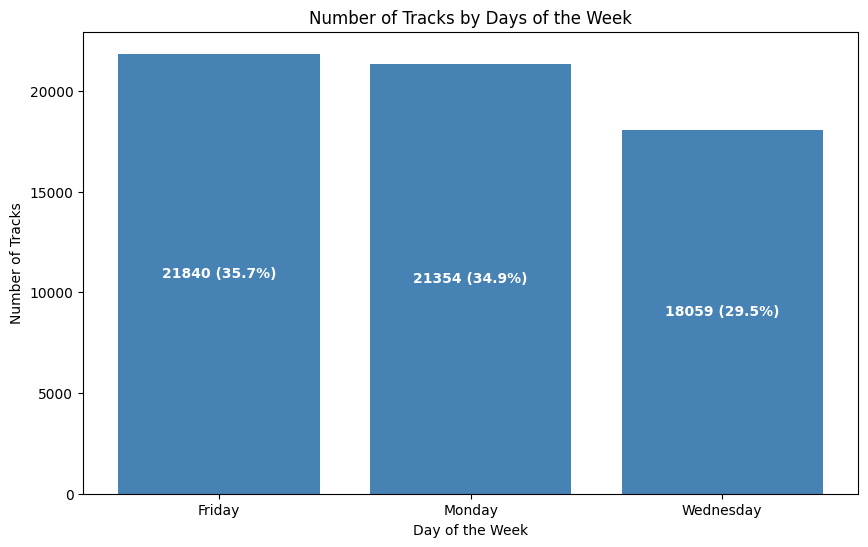

In [19]:
# Converting to lists
labels = day_track_count.index.tolist()
sizes = day_track_count.values.tolist()

# Creating the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='steelblue')

# Adding labels inside the bars
for bar, size in zip(bars, sizes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval / 2, 
             f'{yval} ({yval / sum(sizes) * 100:.1f}%)', 
             ha='center', 
             va='center', 
             color='white', 
             weight='bold')

# Adding title and axis labels
plt.title('Number of Tracks by Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tracks')

# Displaying the plot
plt.show()

On average, users from both cities are less active on Wednesdays. However, the picture may change when considering each city separately.

Let's write the number_tracks() function, which will calculate the number of listens for a given day and city. The function parameters are: day of the week, city name.

In [20]:
# Declaring the function with two parameters: day, city.
def number_tracks(day, city):
    """
    The function calculates the number of tracks listened to by users from a specific city on a specific day.

    Parameters:
    day: value of the day of the week.
    city: name of the city.
    """
    track_list = df[(df['day']==day) & (df['city']==city)]
    track_list_count = track_list['user_id'].count()
    return(track_list_count)

In [21]:
# Getting unique combinations of city and day
unique_combinations = df[['city', 'day']].drop_duplicates()

# Applying the function to all unique combinations
results = []
for index, row in unique_combinations.iterrows():
    city = row['city']
    day = row['day']
    count = number_tracks(day, city)
    results.append({'city': city, 'day': day, 'track_count': count})

# Converting the results to a DataFrame
results_df = pd.DataFrame(results)

# Displaying the results
results_df

,city,day,track_count
0,Saint-Petersburg,Wednesday,7003
1,Moscow,Friday,15945
2,Saint-Petersburg,Monday,5614
3,Moscow,Monday,15740
4,Saint-Petersburg,Friday,5895
5,Moscow,Wednesday,11056


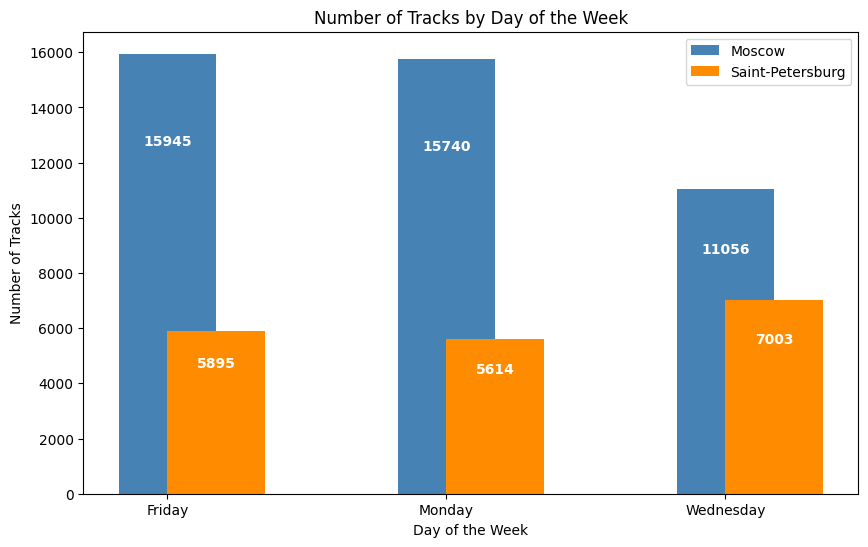

In [22]:
# Splitting the data by cities
moscow_data = results_df[results_df['city'] == 'Moscow']
spb_data = results_df[results_df['city'] == 'Saint-Petersburg']

# Creating the plot
plt.figure(figsize=(10, 6))

# Building a grouped bar chart
bar_width = 0.35
bar1 = plt.bar(moscow_data['day'], 
               moscow_data['track_count'], 
               width=bar_width, 
               label='Moscow', 
               align='center', 
               color='steelblue')

bar2 = plt.bar(spb_data['day'], 
               spb_data['track_count'], 
               width=bar_width, 
               label='Saint-Petersburg', 
               align='edge', 
               color='darkorange')

# Adding labels inside the bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval * 0.8, 
             f'{int(yval)}', 
             ha='center', 
             va='center', 
             color='white', 
             weight='bold')

# Adding title and axis labels
plt.title('Number of Tracks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tracks')
plt.legend()

# Displaying the plot
plt.show()

The data shows a difference in user behaviour:

- In Moscow the peak of listening occurs on Monday and Friday, while there is a decline on Wednesday.
- In Saint Petersburg, on the contrary, more music is listened to on Wednesdays. Activity on Monday and Friday is almost equally lower than on Wednesday.

This means that the data supports the first hypothesis.

### Music at the Beginning and End of the Week

According to the second hypothesis, different genres prevail in Moscow and St. Petersburg on Monday mornings, as well as on Friday evenings.

Let's save the data tables into two variables:

- for Moscow - in moscow_general;
- for St. Petersburg - in spb_general.

In [23]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']

Creating of the function genre_weekday() with four parameters:

- DataFrame with the data,
- Day of the week,
- Start time in 'hh:mm' format,
- End time in 'hh:mm' format.
  
The function should return information about the top 10 genres of tracks listened to on the specified day between the two specified times.

In [24]:
def genre_weekday(df, day, time1, time2):
    genre_df = df[df['day'] == day]  
    genre_df = genre_df[genre_df['time'] < time2] 
    genre_df =  genre_df[genre_df['time'] > time1] 
    genre_df_grouped = genre_df.groupby('genre')['genre'].count() 
    genre_df_sorted = genre_df_grouped.sort_values(ascending=False) 
    genre_df_sorted = genre_df_sorted.reset_index(name='genre_count')
    return genre_df_sorted[:10]

Let's compare the results of the `genre_weekday()` function for Moscow and St. Petersburg on Monday morning (from 7:00 to 11:00) and on Friday evening (from 17:00 to 23:00):

**Moscow, Monday, Morning**

In [25]:
moscow_morning = genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

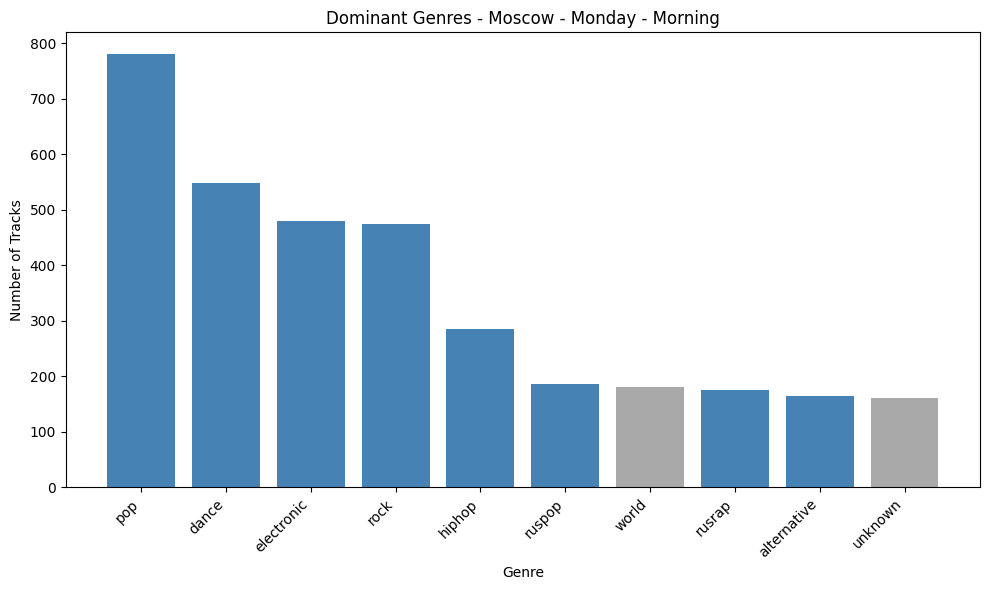

In [26]:
# Colors for columns
colors = ['steelblue' if genre not in ['world', 'unknown'] else 'darkgrey' for genre in moscow_morning['genre']]

# Visualizing the distribution by genres
plt.figure(figsize=(10, 6))
plt.bar(moscow_morning['genre'], moscow_morning['genre_count'], color=colors)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Dominant Genres - Moscow - Monday - Morning')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Saint-Petersburg, Monday, Morning**

In [27]:
spb_morning = genre_weekday(spb_general, 'Monday', '07:00', '11:00')

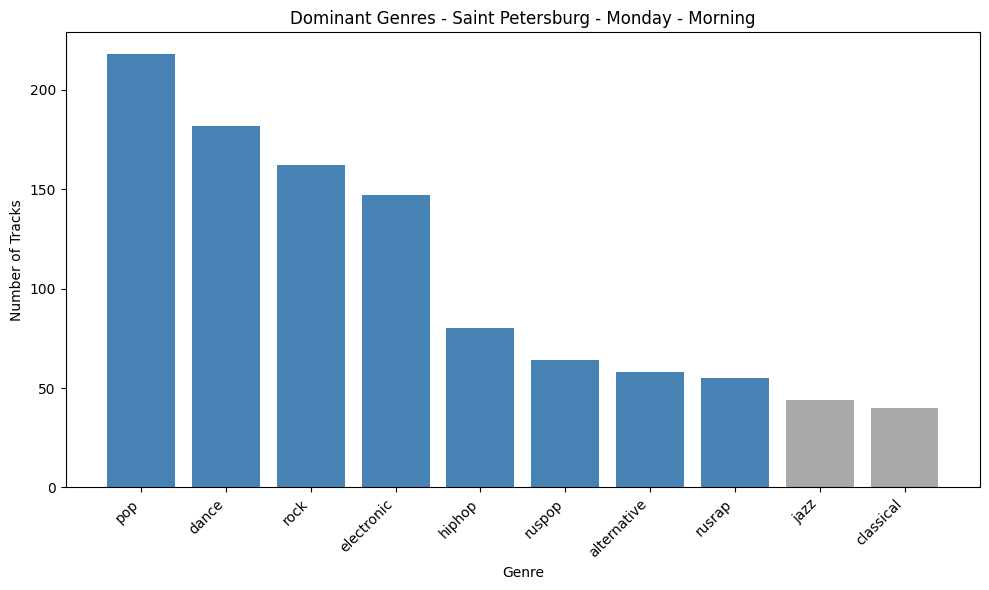

In [28]:
# Colors for columns
colors = ['steelblue' if genre not in ['jazz', 'classical'] else 'darkgrey' for genre in spb_morning['genre']]

# Visualizing the distribution by genres
plt.figure(figsize=(10, 6))
plt.bar(spb_morning['genre'], spb_morning['genre_count'], color = colors)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Dominant Genres - Saint Petersburg - Monday - Morning')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Moscow, Friday, Evening**

In [29]:
moscow_evening = genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

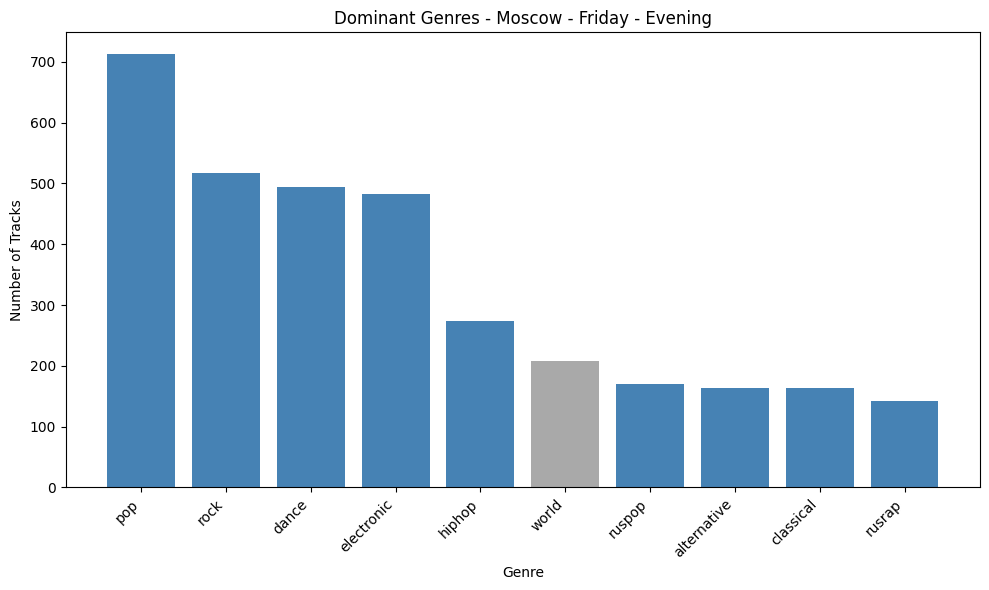

In [30]:
# Colors for columns
colors = ['steelblue' if genre != 'world' else 'darkgrey' for genre in moscow_evening['genre']]

# Visualizing the distribution by genres
plt.figure(figsize=(10, 6))
plt.bar(moscow_evening['genre'], moscow_evening['genre_count'], color = colors)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Dominant Genres - Moscow - Friday - Evening')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Saint-Petersburg, Friday, Evening**

In [31]:
spb_evening = genre_weekday(spb_general, 'Friday', '17:00', '23:00')

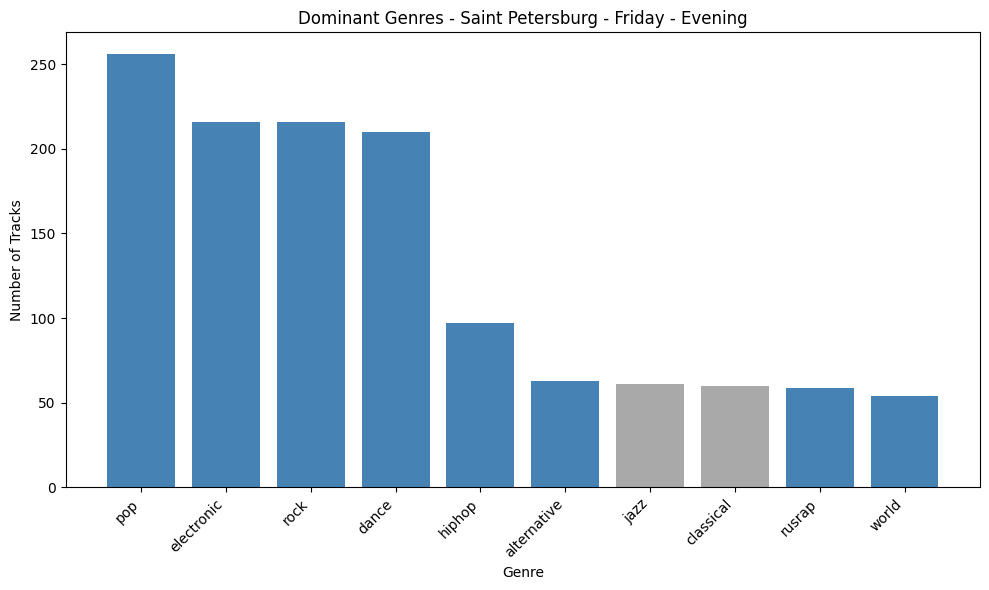

In [32]:
# Colors for columns
colors = ['steelblue' if genre not in ['jazz', 'classical'] else 'darkgrey' for genre in spb_evening['genre']]

# Visualizing the distribution by genres
plt.figure(figsize=(10, 6))
plt.bar(spb_evening['genre'], spb_evening['genre_count'], color=colors)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Dominant Genres - Saint Petersburg - Friday - Evening')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

If we compare the top 10 genres on Monday morning, we can make the following conclusions:

1. Moscow and St. Petersburg listen to similar music. The only difference is that the genre "world" made it into Moscow's ranking, while jazz and classical music made it into St. Petersburg's ranking.

2. In Moscow there were so many missing values that the value `'unknown'` took the tenth place among the most popular genres. This means that missing values occupy a significant portion of the data and threaten the reliability of the study.

Friday evening does not change this picture. Some genres rise slightly, while others fall, but overall, the top 10 remains the same.

Thus, the second hypothesis is only partially confirmed:

- Users listen to similar music at the beginning and end of the week.
- The difference between Moscow and St. Petersburg is not very pronounced. In Moscow Russian popular music is listened to more often, while jazz is popular in St. Petersburg.
  
However, missing data cast doubt on this result. In Moscow there are so many missing values that the top 10 ranking could look different if genre data were not lost.

### Genres Preferences in Moscow and St. Petersburg

Hypothesis: St. Petersburg is the rap capital, where music of this genre is listened to more frequently than in Moscow. Meanwhile, Moscow is a city of contrasts where pop music prevails nonetheless.

Groupping the `moscow_general` table by genre and counting the number of track plays for each genre using the `count()` method. Then sorting the result in descending order and saving it in the `moscow_genres` table.

In [33]:
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)
moscow_genres_top = moscow_genres.head(10).to_frame(name='genre_count').reset_index()

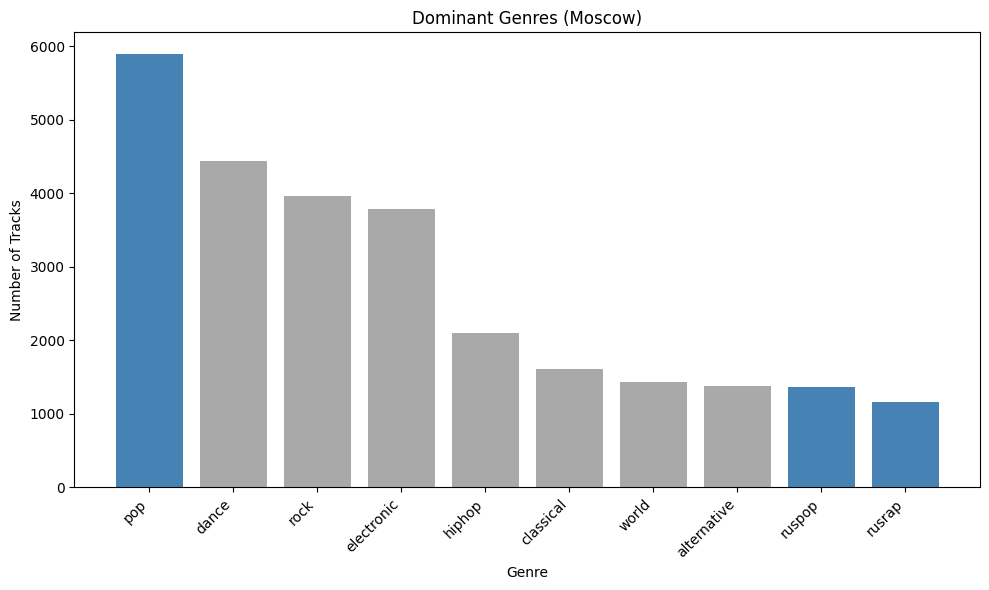

In [34]:
# Colors for columns
colors = ['darkgrey' if genre not in ['pop', 'ruspop', 'rap', 'rusrap'] else 'steelblue' for genre in moscow_genres_top['genre']]

# Visualizing the distribution by genres
plt.figure(figsize=(10, 6))
plt.bar(moscow_genres_top['genre'], moscow_genres_top['genre_count'], color = colors)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Dominant Genres (Moscow)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now let's repeat the procedure to reflect the top 10 popular genres in Saint Petersburg:

In [35]:
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)
spb_genres_top = spb_genres.head(10).to_frame(name='genre_count').reset_index()

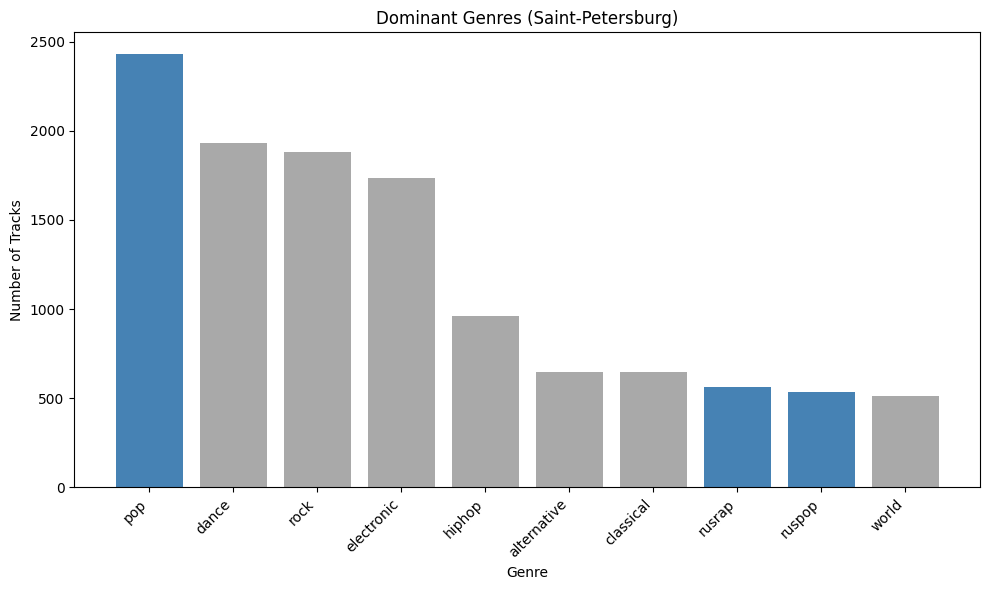

In [36]:
# Colors for columns
colors = ['darkgrey' if genre not in ['pop', 'ruspop', 'rap', 'rusrap'] else 'steelblue' for genre in spb_genres_top['genre']]

# Visualizing the distribution by genres
plt.figure(figsize=(10, 6))
plt.bar(spb_genres_top['genre'], spb_genres_top['genre_count'], color = colors)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Dominant Genres (Saint-Petersburg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The hypothesis was partially confirmed:

- Pop music is the most popular genre in Moscow, as the hypothesis suggested. Moreover, a closely related genre - Russian pop music - is also present in the top 10 genres.
- Contrary to expectations, rap is equally popular in both Moscow and St. Petersburg.

## Research Results

In the course of the research three hypotheses were tested and it was established that:

1. The first hypothesis was fully confirmed: the day of the week affects user activity differently in Moscow and St. Petersburg.

2. The second hypothesis was partially confirmed: musical preferences do not change significantly throughout the week, whether in Moscow or St. Petersburg. Small differences are noticeable at the beginning of the week, on Mondays: in Moscow users listen to the "world" genre, while in St. Petersburg they listen to jazz and classical music. (This result could have been different if not for the missing data.)

3. The third hypothesis was not confirmed: the musical tastes of users in Moscow and St. Petersburg have more similarities than differences. Contrary to expectations, genre preferences in St. Petersburg resemble those in Moscow. If differences in preferences exist, they are not noticeable among the majority of users.